In [1]:
# TODO: the scaling and shifting, the additive vs multiplicative, what else is missing from original prophet, add the comments, see if you can better the original prophet codes, see the different phases such as predicting evaluating and write test cases for all of them.
import pandas as pd
from neuralprophet.neural_prophet import NeuralProphet as Bifrost
from fbprophet import Prophet

In [2]:
# create the dataframe for the holidays

playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

df = pd.read_csv('../data/example_wp_log_peyton_manning.csv')
m = Bifrost(
    n_lags=0,
    seasonality_mode='additive',
    yearly_seasonality=3,
    weekly_seasonality=False,
    daily_seasonality=False,
    holidays=holidays,
    verbose=True
)
m.fit(df)

m = Prophet(holidays=holidays)
# fit = m.fit(df)

AttrDict({'t_start': Timestamp('2007-12-10 00:00:00'), 't_scale': Timedelta('2963 days 00:00:00'), 'y_shift': 8.138957937650906, 'y_scale': 0.8458113663030432})
AttrDict({'type': 'fourier', 'mode': 'additive', 'periods': OrderedDict([('yearly', AttrDict({'resolution': 3, 'period': 365.25, 'arg': 3}))])})
Tabularized inputs shapes:
     time (2905, 1)
     yearly seasonality (2905, 1, 6)
     holidays (2905, 1, 4)
TimeNet(
  (season_params): ParameterDict(  (yearly): Parameter containing: [torch.FloatTensor of size 6])
)
model_complexity 3.1780538303479453
   SmoothL1Loss    MAE  RegLoss
1         0.306  0.625    0.000
2         0.186  0.465    0.000
3         0.181  0.456    0.000
4         0.182  0.459    0.000
5         0.195  0.478    0.000
6         0.177  0.449    0.000
7         0.185  0.464    0.000
8         0.182  0.453    0.000
9         0.183  0.457    0.000
10         0.179  0.453    0.000
11         0.184  0.458    0.000
12         0.188  0.466    0.000
13         0.179  0

,SmoothL1Loss,MAE,RegLoss
0,0.305578,0.625067,0.0
1,0.185516,0.465164,0.0
2,0.181429,0.455961,0.0
3,0.182469,0.458993,0.0
4,0.195266,0.478381,0.0
5,0.176567,0.449460,0.0
6,0.185253,0.463558,0.0
7,0.181692,0.452907,0.0
8,0.183200,0.456557,0.0
9,0.178661,0.453153,0.0


Tabularized inputs shapes:
     time (2965, 1)
     yearly seasonality (2965, 1, 6)
     holidays (2965, 1, 4)
Tabularized inputs shapes:
     time (2965, 1)
     yearly seasonality (2965, 1, 6)
     holidays (2965, 1, 4)


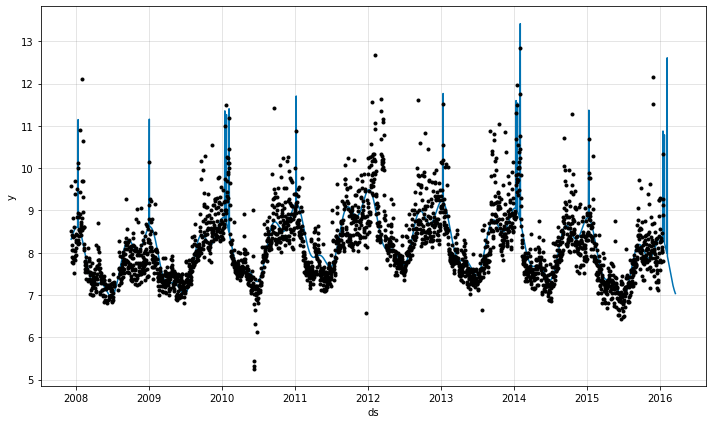

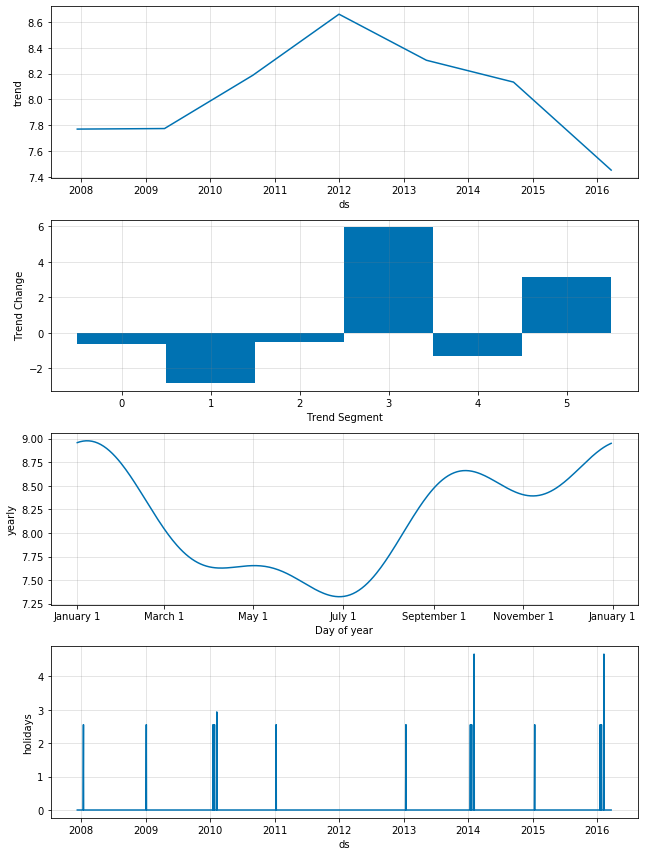

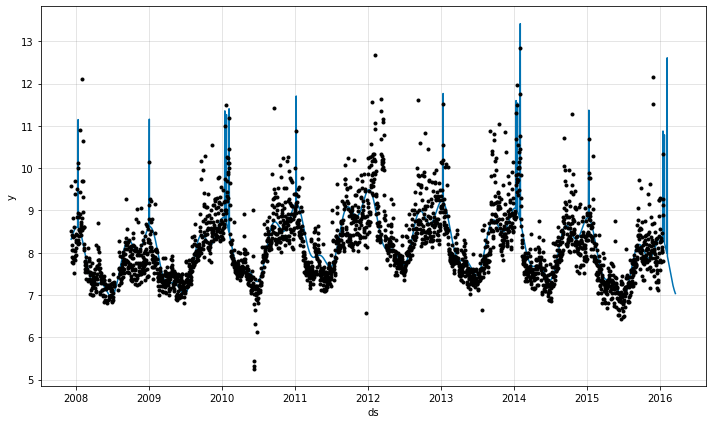

In [4]:
# future = m.make_future_dataframe(periods=60)
# forecast = m.predict(future)

forecast = m.predict(future_periods=60)
m.plot_components(forecast)
m.plot(forecast)
